### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [19]:
!pip install --upgrade scikit-learn

     ---------------------------------------- 9.2/9.2 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#defining path
path = r'C:\Users\gullo\OneDrive\Desktop\Career_Foundry\Data Immersion'


In [4]:
#3 import file
df = pd.read_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_clean.csv'), encoding='latin-1')

In [5]:
df.shape

(46743, 11)

In [6]:
df.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [16]:
# Select only numeric columns for clustering
numeric_columns = df.select_dtypes(include=[np.number])

num_cl = range(1, 10)  # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl]  # Defines k-means clusters in the range assigned above.

score = [kmeans[i].fit(numeric_columns).score(numeric_columns) for i in range(len(kmeans))]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

C:\Users\gullo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gullo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gullo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gullo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gullo\anaconda3\lib\site-packages\sklearn\clust

[-10459697228380.14,
 -2640104876134.643,
 -1180103276157.7722,
 -673410383348.1166,
 -437457185368.664,
 -308623001017.8266,
 -232949835455.78442,
 -181114843294.48193,
 -147443465975.2822]

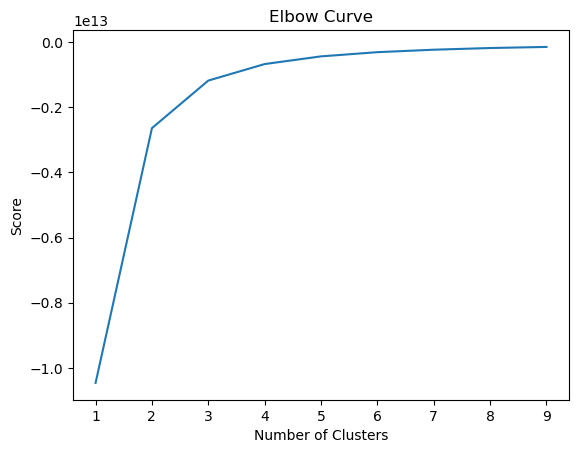

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.

### 3. k-means clustering

In [34]:

from sklearn.preprocessing import StandardScaler

# preprocess data and kept only numeric columns
# If not, refer to the previous steps on how to preprocess the data

# Create a DataFrame with the numeric data for clustering
df_numeric = df.drop(['name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'Type'], axis=1)
df_numeric['rate'] = pd.to_numeric(df_numeric['rate'].replace('NEW', np.nan).replace('-', np.nan))
df_numeric = df_numeric.dropna()

# Scale the data (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Create the KMeans object with the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the KMeans object to the scaled data and get the cluster labels
df['clusters'] = kmeans.fit_predict(scaled_data)

# Now, the 'clusters' column in your DataFrame 'df' contains the assigned cluster labels


In [35]:
df['clusters'].value_counts()

1    21426
2    20235
0     5082
Name: clusters, dtype: int64

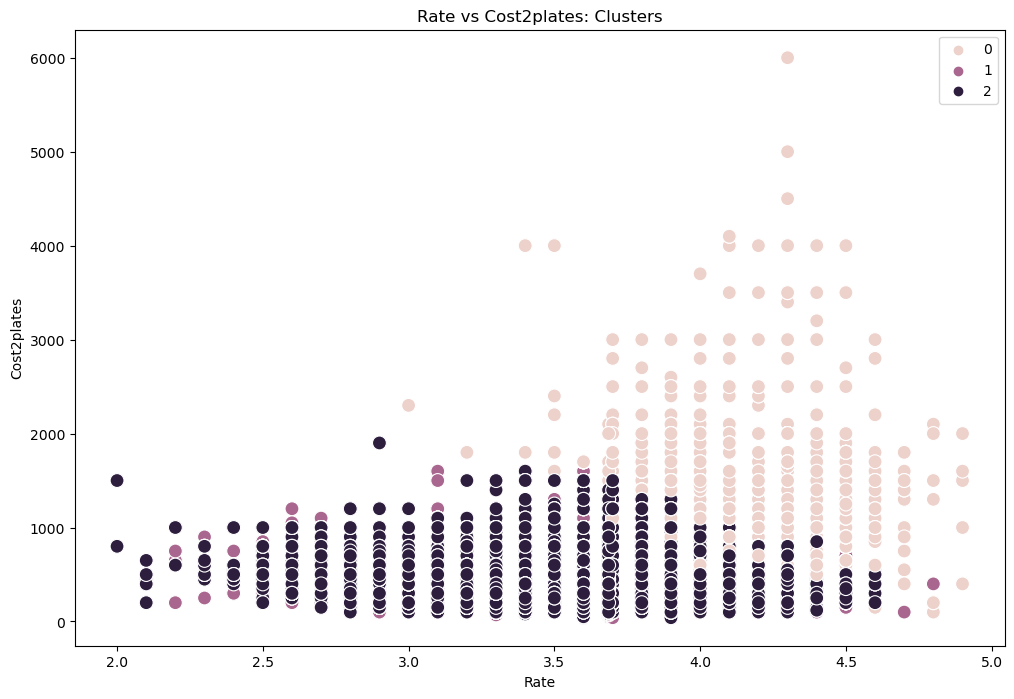

In [44]:
# Plot the clusters for the "rate" and "Cost2plates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rate'], y=df['Cost2plates'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rate') # Label x-axis.
plt.ylabel('Cost2plates') # Label y-axis.
plt.title("Rate vs Cost2plates: Clusters")

#save figure
file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'rate_vs_cost2plates_clusters.png')
plt.savefig(file_path)

plt.show()

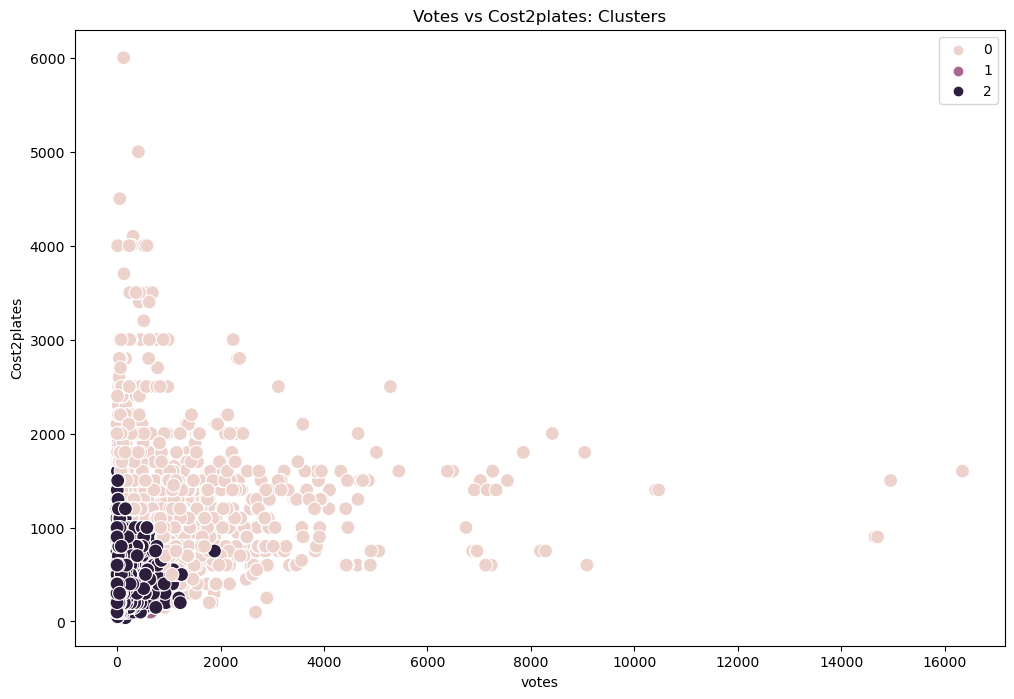

In [45]:
# Plot the clusters for the "votes" and "Cost2plates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['votes'], y=df['Cost2plates'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('votes') 
plt.ylabel('Cost2plates')
plt.title("Votes vs Cost2plates: Clusters")

#save figure
file_path = os.path.join('C:/Users/gullo/OneDrive/Desktop/Career_Foundry/Data Immersion/A6- Advanced Analytics & Dashboard Design/Viz', 'votes_vs_cost2plates_clusters.png')
plt.savefig(file_path)
plt.show()

In [41]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
df.groupby('cluster').agg({'votes':['mean', 'median'], 
                         'rate':['mean', 'median'],
                          'Cost2plates':['mean', 'median']})

votes             rate            Cost2plates        
                   mean median      mean    median         mean  median
cluster                                                                
dark purple   83.123647   23.0  3.617861  3.686137   420.516333   400.0
pink         997.866982  751.0  4.123665  4.100000  1332.408501  1200.0
purple        84.745076   24.0  3.604697  3.686137   420.530057   400.0

### Dark Purple: 
##### 1. This cluster has relatively lower average votes and ratings but moderately high Cost2plates. 
##### 2. It indicates that these restaurants may not be as popular or highly rated by customers compared to the other clusters. 
##### 3. Despite having lower  votes and ratings, these restaurants have a moderately high average cost per plate (approximately 420.52) which suggests that these restaurants might be charging higher prices for their dishes despite not being highly rated or popular among customers. 
##### 4. These restaurants may cater to a niche market or offer unique dishes that attract a specific customer segment willing to pay more for their meals.



### Pink: 
##### 1.This cluster has significantly higher average votes, ratings, and Cost2plates compared to other clusters. 
##### 2. It indicates that these restaurants are quite popular and receive higher ratings from customers compared to the other clusters. 
##### 3. In addition to higher votes and ratings, these restaurants also have a substantially higher average cost per plate (approximately 1332.41) which suggests that these popular restaurants might justify their higher prices with the quality of their food and service. 
##### 4. The 'pink' cluster likely includes well-established and well-reputed restaurants that have a loyal customer base and are preferred by customers for their dining experiences.



### Purple: 
##### 1. This cluster has similar characteristics to the 'dark purple' cluster, with moderately low average votes and ratings but moderately high Cost2plates. 
##### 2. This suggests that they might also charge higher prices despite not being highly popular or rated. 
##### 3. Similar to the 'dark purple' cluster, restaurants in this 'purple' cluster also have a moderately high average cost per plate (approximately 420.53) which suggests that they might also charge higher prices despite not being highly popular or rated. 
##### 4. The 'purple' cluster restaurants could be operating in a competitive market where they aim to differentiate themselves based on the quality and uniqueness of their dishes, which might justify the higher prices.



### Overall, the clustering analysis has provided insights into different types of restaurants based on their popularity, ratings, and cost per plate. The 'pink' cluster stands out as the most popular and highly rated one, potentially representing well-known and successful establishments. The 'dark purple' and 'purple' clusters have lower popularity and ratings but may have a distinct customer base willing to pay higher prices for their offerings. It's essential to investigate further and understand the characteristics and marketing strategies of these clusters' restaurants to make more informed business decisions.